<div style="text-align: center;">
  <img src="https://github.com/Hack-io-Data/Imagenes/blob/main/01-LogosHackio/logo_naranja@4x.png?raw=true" alt="esquema" />
</div>


# Laboratorio de Feature Scaling

Continuando con nuestro proyecto en AutoRenew, la empresa de coches de segunda mano, en este laboratorio abordarás una fase crucial del preprocesamiento de datos: el **Feature Scaling**. Este paso es esencial para asegurar que todas las características (variables) de los coches se encuentren en la misma escala antes de entrenar los modelos de Machine Learning. Esto evitará que algunas características dominen sobre otras debido a sus rangos de valores diferentes, mejorando así la precisión del modelo predictivo que estás desarrollando.

Tu tarea en este laboratorio es aplicar técnicas de Feature Scaling a las características del conjunto de datos que consideres relevantes. Este paso es fundamental para preparar los datos de manera adecuada para el entrenamiento de modelos de Machine Learning, lo que haremos en los próximos ejercicios.

**Columnas del conjunto de datos que podrías escalar:**

- **price**: Precio del coche.

- **powerCV**: Potencia del coche en caballos de vapor (CV).

- **kilometer**: Kilometraje total del coche.

- **yearOfRegistration**: Año de registro del coche (aunque es una característica temporal, en algunos casos puede necesitar escalado dependiendo del enfoque del modelo).

- **monthOfRegistration**: Mes de registro del coche.

**Instrucciones:**

1. **Identificación de las características a escalar:** Revisa el conjunto de datos y selecciona las columnas que deberían ser escaladas. Estas generalmente incluyen características numéricas continuas como el precio, la potencia y el kilometraje.

2. **Aplicación de técnicas de Feature Scaling**


3. **Comparación de resultados:** Después de aplicar el escalado, observa cómo han cambiado las distribuciones de las características. Evalúa cuál de las técnicas de escalado es más apropiada para este conjunto de datos y justifica tu elección.

**Nota:** Este laboratorio se construye sobre el análisis exploratorio y la gestión de nulos que realizaste anteriormente. Asegúrate de mantener una buena documentación de tus procesos, ya que utilizaremos estos datos escalados en las próximas etapas de modelado de Machine Learning.


In [ ]:
# -----------------------------------------------------------------------
from sklearn.preprocessing import MinMaxScaler, Normalizer, StandardScaler, RobustScaler

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd

# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

# Otros objetivos
# -----------------------------------------------------------------------
import math
import sys
import os

# Acceso a src

sys.path.append('../') #pongo los 2 puntos para que salga de la carpeta
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('C:\\Users\\DELL\Git\\Lab_EDA_Gestion_Nulos\\datos\\df_iterative.csv', index_col=0)
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerCV,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,lastSeen,year_created,month_created
0,2016-03-24 11:52:17,Golf_3_1.6,private,offer,480,test,Desconocido,Modernos,manually,124.738002,golf,150000,Desconocido,petrol,volkswagen,Desconocido,2016-04-07 03:16:57,2016,3
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,private,offer,18300,test,coupe,Actuales,manually,187.000000,Desconocido,125000,5,diesel,audi,yes,2016-04-07 01:46:50,2016,3
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",private,offer,9800,test,suv,Modernos,automatic,161.000000,grand,125000,8,diesel,jeep,Desconocido,2016-04-05 12:47:46,2016,3
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,private,offer,1500,test,small car,Modernos,manually,74.000000,golf,150000,6,petrol,volkswagen,no,2016-03-17 17:40:17,2016,3
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,private,offer,3600,test,small car,Modernos,manually,68.000000,fabia,90000,7,diesel,skoda,no,2016-04-06 10:17:21,2016,3


In [3]:
df.describe()

,price,powerCV,kilometer,year_created,month_created
count,360574.000000,360574.000000,360574.000000,360574.000000,360574.000000
mean,5858.772654,124.738002,125690.315996,2015.999914,3.161002
std,8261.664458,61.420354,39800.627783,0.009566,0.377744
min,1.000000,5.000000,5000.000000,2014.000000,1.000000
25%,1250.000000,85.000000,125000.000000,2016.000000,3.000000
50%,3000.000000,120.000000,150000.000000,2016.000000,3.000000
75%,7490.000000,148.000000,150000.000000,2016.000000,3.000000
max,199900.000000,1485.000000,150000.000000,2016.000000,12.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 360574 entries, 0 to 360573
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   dateCrawled          360574 non-null  object 
 1   name                 360574 non-null  object 
 2   seller               360574 non-null  object 
 3   offerType            360574 non-null  object 
 4   price                360574 non-null  int64  
 5   abtest               360574 non-null  object 
 6   vehicleType          360574 non-null  object 
 7   yearOfRegistration   360574 non-null  object 
 8   gearbox              360574 non-null  object 
 9   powerCV              360574 non-null  float64
 10  model                360574 non-null  object 
 11  kilometer            360574 non-null  int64  
 12  monthOfRegistration  360574 non-null  object 
 13  fuelType             360574 non-null  object 
 14  brand                360574 non-null  object 
 15  notRepairedDamage    3

In [5]:
escalador_robust = RobustScaler()
datos_transf_robust = escalador_robust.fit_transform(df[["powerCV", 'kilometer']])
df[["powerCV_robust", 'kilometer_robust']] = datos_transf_robust

escalador_min_max = MinMaxScaler()
datos_transf_min_max = escalador_min_max.fit_transform(df[["powerCV", 'kilometer']])
df[["powerCV_minmax", 'kilometer_minmax']] = datos_transf_min_max

escalador_norm = Normalizer()
datos_transf_norm = escalador_norm.fit_transform(df[["powerCV", 'kilometer']])
df[["powerCV_norm", 'kilometer_norm']] = datos_transf_norm

escalador_stand = StandardScaler()
datos_transf_stand = escalador_stand.fit_transform(df[["powerCV", 'kilometer']])
df[["powerCV_stand", 'kilometer_stand']] = datos_transf_stand

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,360574.0,5.858773e+03,8261.664458,1.000000,1250.000000,3000.000000,7490.000000,199900.000000
powerCV,360574.0,1.247380e+02,61.420354,5.000000,85.000000,120.000000,148.000000,1485.000000
kilometer,360574.0,1.256903e+05,39800.627783,5000.000000,125000.000000,150000.000000,150000.000000,150000.000000
year_created,360574.0,2.016000e+03,0.009566,2014.000000,2016.000000,2016.000000,2016.000000,2016.000000
month_created,360574.0,3.161002e+00,0.377744,1.000000,3.000000,3.000000,3.000000,12.000000
powerCV_robust,360574.0,7.520639e-02,0.974926,-1.825397,-0.555556,0.000000,0.444444,21.666667
kilometer_robust,360574.0,-9.723874e-01,1.592025,-5.800000,-1.000000,0.000000,0.000000,0.000000
powerCV_minmax,360574.0,8.090406e-02,0.041500,0.000000,0.054054,0.077703,0.096622,1.000000
kilometer_minmax,360574.0,8.323470e-01,0.274487,0.000000,0.827586,1.000000,1.000000,1.000000
powerCV_norm,360574.0,1.656374e-03,0.003909,0.000033,0.000667,0.000860,0.001271,0.265873


In [7]:
df['powerCV'].agg(['mean', 'median'])

mean      124.738002
median    120.000000
Name: powerCV, dtype: float64

In [8]:
df['kilometer'].agg(['mean', 'median'])

mean      125690.315996
median    150000.000000
Name: kilometer, dtype: float64

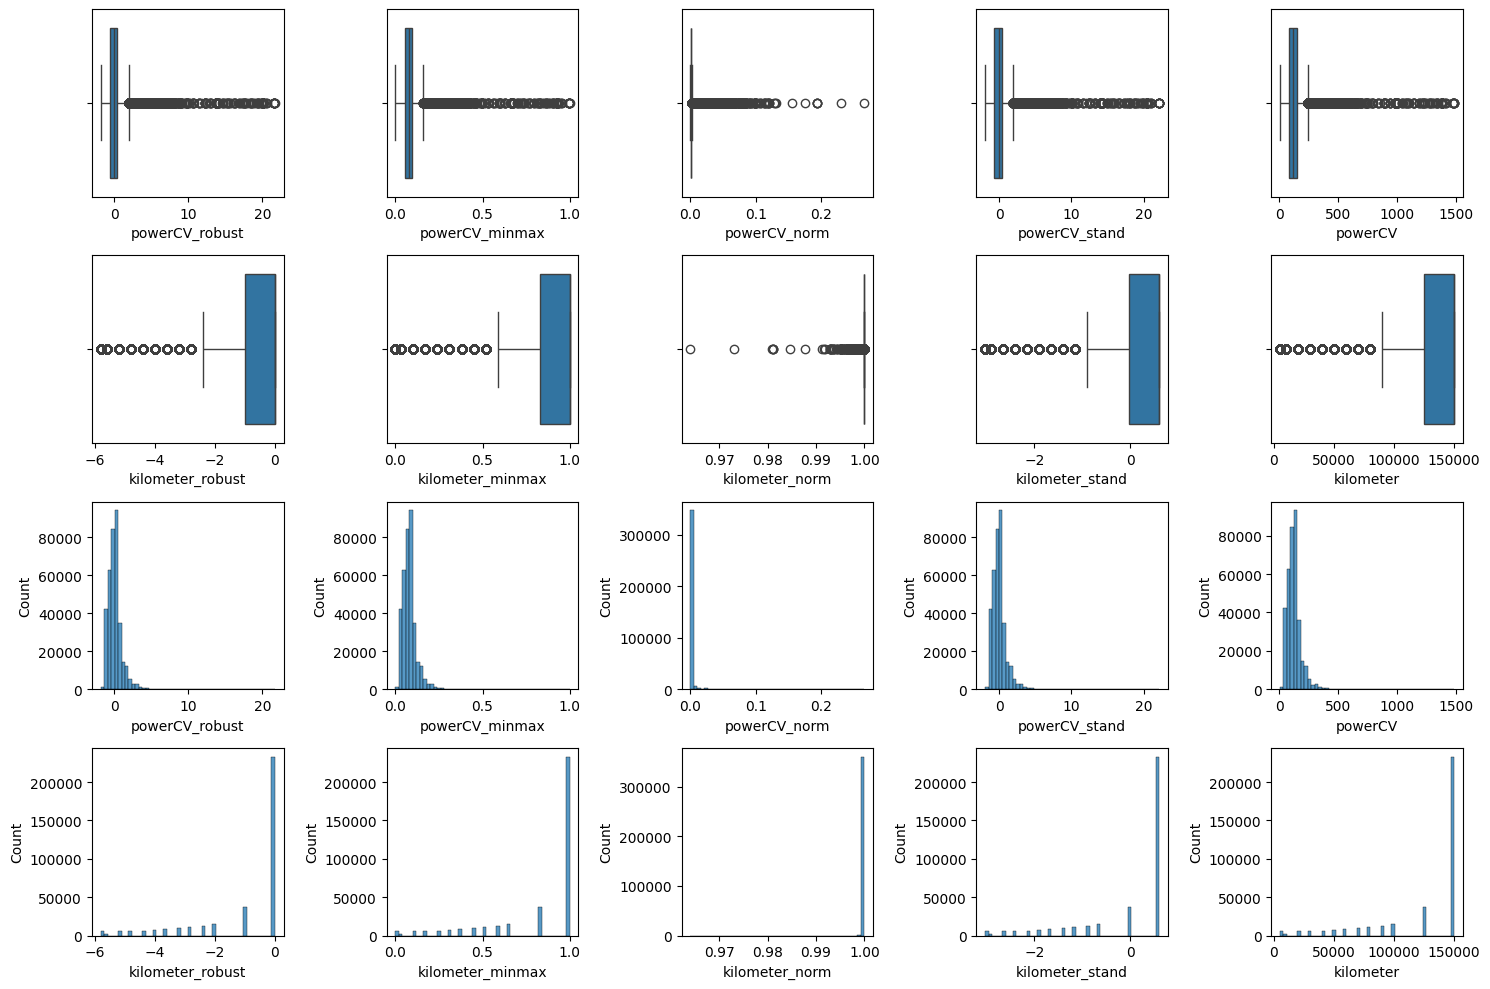

In [9]:
fig , axes = plt.subplots(nrows=4 , ncols=5, figsize = (15, 10))
sns.boxplot(x = "powerCV_robust", data = df, ax = axes[0][0])
sns.boxplot(x = "powerCV_minmax", data = df, ax = axes[0][1])
sns.boxplot(x = "powerCV_norm", data = df, ax = axes[0][2])
sns.boxplot(x = "powerCV_stand", data = df, ax = axes[0][3])
sns.boxplot(x = "powerCV", data = df, ax = axes[0][4])

sns.boxplot(x = "kilometer_robust", data = df, ax = axes[1][0])
sns.boxplot(x = "kilometer_minmax", data = df, ax = axes[1][1])
sns.boxplot(x = "kilometer_norm", data = df, ax = axes[1][2])
sns.boxplot(x = "kilometer_stand", data = df, ax = axes[1][3])
sns.boxplot(x = "kilometer", data = df, ax = axes[1][4])

sns.histplot(x = "powerCV_robust", data = df, ax = axes[2][0], bins = 50)
sns.histplot(x = "powerCV_minmax", data = df, ax = axes[2][1], bins = 50)
sns.histplot(x = "powerCV_norm", data = df, ax = axes[2][2], bins = 50)
sns.histplot(x = "powerCV_stand", data = df, ax = axes[2][3], bins = 50)
sns.histplot(x = "powerCV", data = df, ax = axes[2][4], bins = 50)


sns.histplot(x = "kilometer_robust", data = df, ax = axes[3][0], bins = 50)
sns.histplot(x = "kilometer_minmax", data = df, ax = axes[3][1], bins = 50)
sns.histplot(x = "kilometer_norm", data = df, ax = axes[3][2], bins = 50)
sns.histplot(x = "kilometer_stand", data = df, ax = axes[3][3], bins = 50)
sns.histplot(x = "kilometer", data = df, ax = axes[3][4], bins = 50)

plt.tight_layout()

# Conclusión

Según los gráficos presentes, he decidido con el método robusto porque mis outliers tienen importancia para este proceso. Además fueron una elección de mi parte marcar su punto.

Es cierto que en la visualización del boxplot de kilometer podemos ver cómo muestra los datos outliers hacia la izquierda esto debido a que tiene una concentración alta de este valor porque son vehículos de segunda mano y no tan recientes. Esto genera sentido al mostrar esos datos tan pequeños, como su mínimo, en 5000km que se presenta como un dato atípico en consideración a su media (150000).

En cuanto al powerCV, en la gráfica de distribución veo como se desliza ligeramente hacia la izquierda donde coloca su media en 0. De esta forma puedo centrar los datos sin distorsionar el rango debido a los valores atípicos. Esto es algo que se presenta en el boxplot pero se puede ver mejor en el histograma. Que tiene una alta concentración en una cantidad pequeña pero una gran distribución hasta un primer punto final marcado como límite (1500) en el proceso anterior. Usando este modelo, con la mediana y el IQR, podemos mantener una interpretación más centrada en los datos reales sin dejar nuestros outliers.

In [11]:
df.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerCV', 'model',
       'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'lastSeen', 'year_created', 'month_created',
       'powerCV_robust', 'kilometer_robust', 'powerCV_minmax',
       'kilometer_minmax', 'powerCV_norm', 'kilometer_norm', 'powerCV_stand',
       'kilometer_stand'],
      dtype='object')

In [17]:
columnas_seleccionadas = ['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest', 'vehicleType', 'yearOfRegistration', 'gearbox', 'powerCV_robust', 'model',
       'kilometer_robust', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'lastSeen', 'year_created', 'month_created']

In [18]:
df_filtrado = df[columnas_seleccionadas]

# Mostrar el DataFrame reducido
df_filtrado.head()


,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerCV_robust,model,kilometer_robust,monthOfRegistration,fuelType,brand,notRepairedDamage,lastSeen,year_created,month_created
0,2016-03-24 11:52:17,Golf_3_1.6,private,offer,480,test,Desconocido,Modernos,manually,0.075206,golf,0.0,Desconocido,petrol,volkswagen,Desconocido,2016-04-07 03:16:57,2016,3
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,private,offer,18300,test,coupe,Actuales,manually,1.063492,Desconocido,-1.0,5,diesel,audi,yes,2016-04-07 01:46:50,2016,3
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",private,offer,9800,test,suv,Modernos,automatic,0.650794,grand,-1.0,8,diesel,jeep,Desconocido,2016-04-05 12:47:46,2016,3
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,private,offer,1500,test,small car,Modernos,manually,-0.730159,golf,0.0,6,petrol,volkswagen,no,2016-03-17 17:40:17,2016,3
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,private,offer,3600,test,small car,Modernos,manually,-0.825397,fabia,-2.4,7,diesel,skoda,no,2016-04-06 10:17:21,2016,3


In [19]:
df_filtrado.shape

(360574, 19)

In [ ]:
df_filtrado.to_csv('datos/df_filtrado.csv')